---
# Decision Tree And Regression Tree
---
## I. Input tge library and Prepare the Data

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [73]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/1. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,concave points_mean,concavity_mean,concave points_worst,compactness_mean,perimeter_worst,concavity_worst,radius_worst,perimeter_mean,area_worst,area_mean,fractal_dimension_mean
0,M,0.14710,0.3001,0.2654,0.27760,184.60,0.7119,25.38,122.80,2019.0,1001.0,0.07871
1,M,0.07017,0.0869,0.1860,0.07864,158.80,0.2416,24.99,132.90,1956.0,1326.0,0.05667
2,M,0.12790,0.1974,0.2430,0.15990,152.50,0.4504,23.57,130.00,1709.0,1203.0,0.05999
3,M,0.10520,0.2414,0.2575,0.28390,98.87,0.6869,14.91,77.58,567.7,386.1,0.09744
4,M,0.10430,0.1980,0.1625,0.13280,152.20,0.4000,22.54,135.10,1575.0,1297.0,0.05883


In [74]:
benign = df[df.diagnosis == 'B']
maglignant = df[df.diagnosis == 'M']

In [75]:
X = df[["concave points_mean", "fractal_dimension_mean"]].values
y = np.where(df.diagnosis == "B", 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Text(0.5, 1.0, 'Linearly Data')

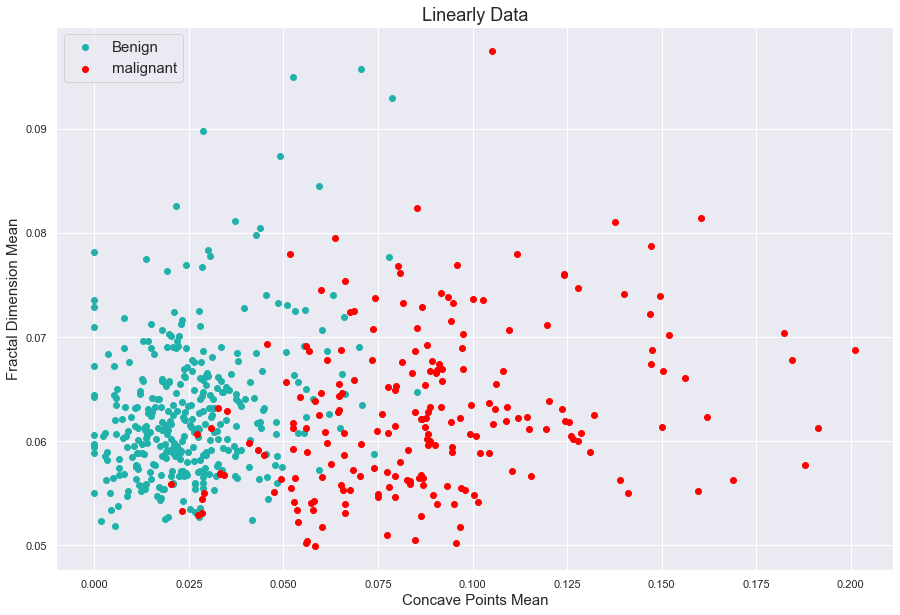

In [76]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))

ax1.scatter(benign['concave points_mean'], 
            benign['fractal_dimension_mean'], 
            color = "lightseagreen", 
            label = "Benign")
ax1.scatter(maglignant['concave points_mean'], 
            maglignant['fractal_dimension_mean'], 
            color = "red", 
            label = "malignant")
ax1.set_xlabel("Concave Points Mean", fontsize = 15)
ax1.set_ylabel("Fractal Dimension Mean", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Data", fontsize = 18)

### II. Call the Decision Tree Classifier function From Scikit Learn to train dataset
1. Now we can call the decision tree classifier function to train the dataset

In [77]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth=5, random_state=2)
dtree_model.fit(X_train, y_train)
predictions = dtree_model.predict(X_test)

2. After training the dataset, now we can predict the test data base on the model we trained

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       109
           1       0.89      0.95      0.92        62

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



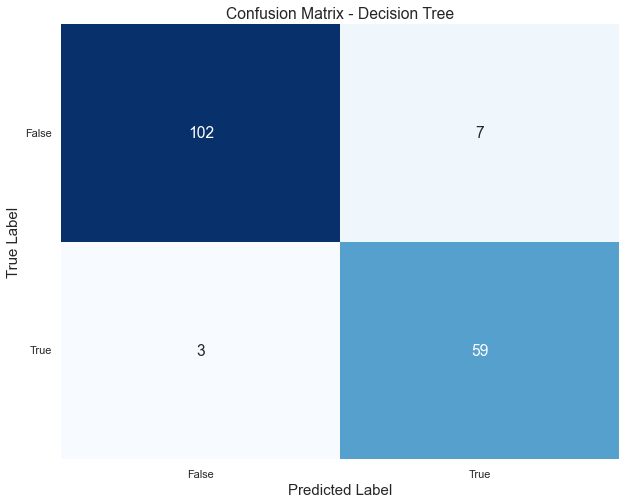

In [79]:
# The confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)

# Convert confusion matrix into dataframe
df_matrix = pd.DataFrame(cf_matrix)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(df_matrix, annot = True, fmt = "g", ax = ax, cmap = "Blues", cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(['False','True'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['False','True'], rotation=0)
plt.show()

3. Now is the time we visualize the tree structure and decision region of our model

['concave points_mean', 'fractal_dimension_mean']
|--- concave points_mean <= 0.06
|   |--- concave points_mean <= 0.05
|   |   |--- concave points_mean <= 0.03
|   |   |   |--- fractal_dimension_mean <= 0.06
|   |   |   |   |--- fractal_dimension_mean <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fractal_dimension_mean >  0.06
|   |   |   |   |   |--- class: 1
|   |   |   |--- fractal_dimension_mean >  0.06
|   |   |   |   |--- class: 0
|   |   |--- concave points_mean >  0.03
|   |   |   |--- fractal_dimension_mean <= 0.06
|   |   |   |   |--- concave points_mean <= 0.04
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- concave points_mean >  0.04
|   |   |   |   |   |--- class: 0
|   |   |   |--- fractal_dimension_mean >  0.06
|   |   |   |   |--- fractal_dimension_mean <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fractal_dimension_mean >  0.06
|   |   |   |   |   |--- class: 0
|   |--- concave points_mean >  0.05
|   |   |--- fractal_dimensio

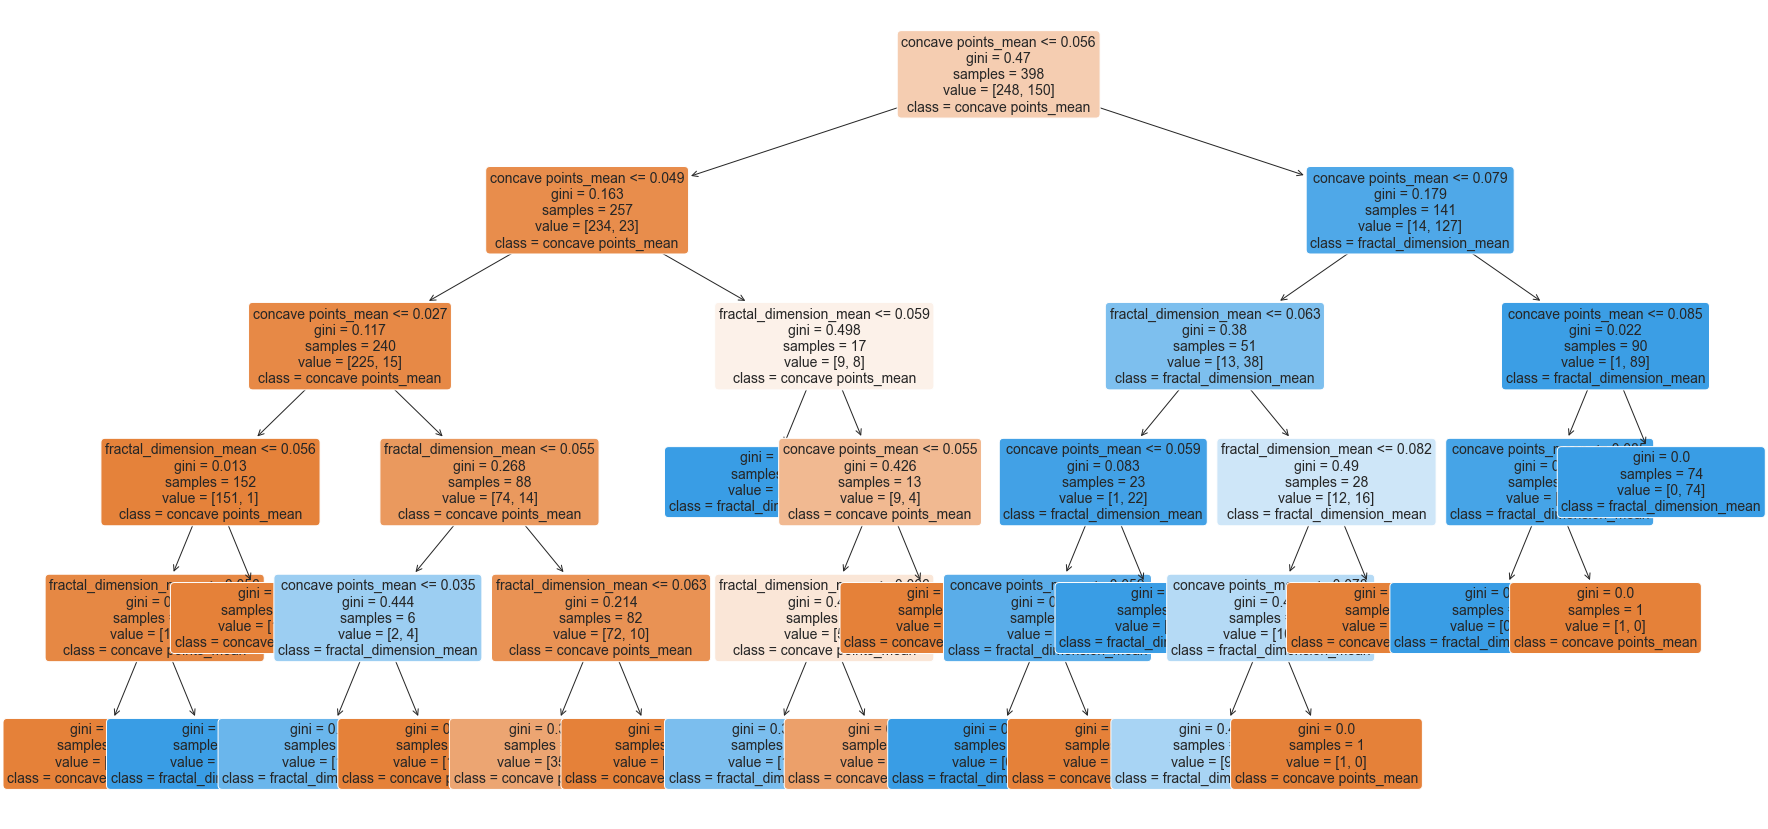

In [81]:
features = ['concave points_mean', 'fractal_dimension_mean']
print(features)
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(dtree_model,
                         feature_names = features)

print(tree_rules, "\n")
plt.figure(figsize=(30, 15))
a = plot_tree(dtree_model,
                   feature_names = features,
                   class_names = features,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

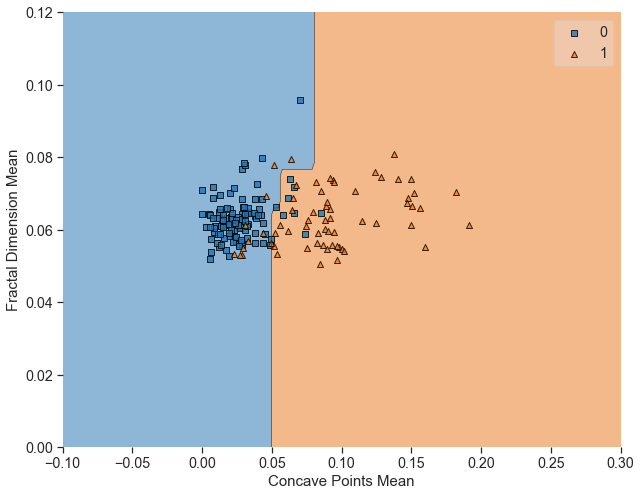

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = dtree_model)
plt.xlabel('Concave Points Mean', fontsize = 15)
plt.ylabel('Fractal Dimension Mean', fontsize = 15)
plt.xlim(-0.1, 0.3)
plt.ylim(0, 0.12)
plt.grid()
plt.show()

---
# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error


dtree_R_model = DecisionTreeRegressor(max_depth = 5) 
dtree_R_model.fit(X_train, y_train)
predictions = dtree_R_model.predict(X_test)
print(f"MSE Decision Tree Regression: {mean_squared_error(y_test, predictions)} \n")


MSE Decision Tree Regression: 0.10429150402178548 

